In [42]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Properties of correlation

In [43]:
hybrid = Table.read_table('http://inferentialthinking.com/notebooks/hybrid.csv')
suv = hybrid.where('class', 'SUV')
suv.show(3)

vehicle,year,msrp,acceleration,mpg,class
Escape,2004,36676.1,10.32,31.99,SUV
Lexus RX400h,2005,58521.1,12.76,28.23,SUV
Highlander,2005,29186.2,12.76,29.4,SUV


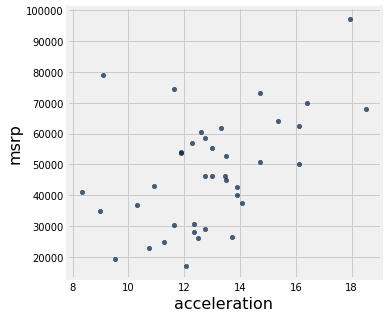

In [44]:
suv.scatter('acceleration', 'msrp')

In [45]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers)) / np.std(any_numbers)  

def standardize(t):
    """Return a table in which all columns of t are converted to standard units."""
    t_su = Table()
    for label in t.labels:
        t_su = t_su.with_column(label + ' (su)', standard_units(t.column(label)))
    return t_su

def correlation(t, x, y):
    """Return the correlation coefficient (r) of two variables."""
    return np.mean(standard_units(t.column(x)) * standard_units(t.column(y)))

In [46]:
correlation(suv, 'acceleration', 'msrp')

0.48699799279959155

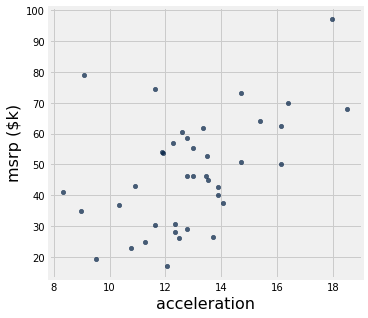

In [49]:
suv_1k = suv.with_column('msrp ($k)', suv.column('msrp')/1000)
suv_1k.scatter('acceleration', 'msrp ($k)')

In [50]:
correlation(suv_1k, 'acceleration', 'msrp ($k)')

0.48699799279959155

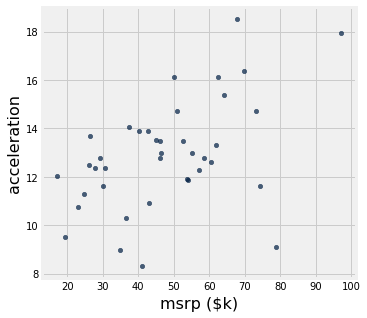

In [51]:
suv_1k.scatter('msrp ($k)', 'acceleration')

In [52]:
correlation(suv_1k, 'msrp ($k)', 'acceleration')

0.48699799279959155

## Interpreting correlation

Visualize, then quantify!

In [53]:
ac = Table.read_table('http://inferentialthinking.com/notebooks/anscombe.csv')
ac.show(3)

x1,x2,x3,x4,y1,y2,y3,y4
10,10,10,8,8.04,9.14,7.46,6.58
8,8,8,8,6.95,8.14,6.77,5.76
13,13,13,8,7.58,8.74,12.74,7.71


In [54]:
# Same everything! But...
def stats_ac(i):
    i = str(i)
    x = 'x' + i
    y = 'y' + i
    print(x + ' mean:', np.round(np.mean(ac.column(x)), 2))
    print(y + ' mean:', np.round(np.mean(ac.column(y)), 2))
    print(x + ' SD:', np.round(np.std(ac.column(x)), 2))
    print(y + ' SD:', np.round(np.std(ac.column(y)), 2))
    print('xy' + i + ' r:', np.round(correlation(ac, 'x' + i, 'y' + i), 2))

_ = interact(stats_ac, i=(1, 4))

In [55]:
# Clearly not the same datasets
def scatter_ac(i):
    ac.scatter('x' + str(i), 'y' + str(i))
    plt.show()
    
_ = interact(scatter_ac, i=(1, 4))

In [56]:
new_x = np.arange(-4, 4.1, 0.5)
nonlinear = Table().with_columns(
        'x', new_x,
        'y', new_x**2
    )
nonlinear

x,y
-4,16
-3.5,12.25
-3,9
-2.5,6.25
-2,4
-1.5,2.25
-1,1
-0.5,0.25
0,0
0.5,0.25


In [57]:
correlation(nonlinear, 'x', 'y')

0.0

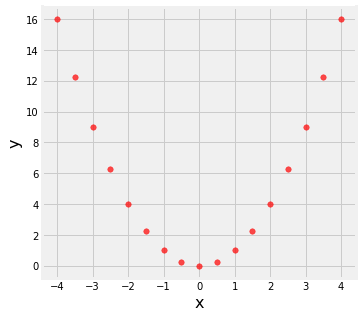

In [58]:
nonlinear.scatter('x', 'y', s=30, color='r')

In [59]:
line = Table().with_columns(
        'x', [1, 2, 3, 4],
        'y', [1, 2, 3, 4]
    )
line

x,y
1,1
2,2
3,3
4,4


In [60]:
correlation(line, 'x', 'y')

1.0

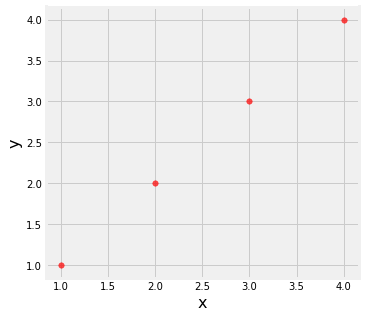

In [61]:
line.scatter('x', 'y', s=30, color='r')

In [62]:
outlier = Table().with_columns(
        'x', [1, 2, 3, 4, 5],
        'y', [1, 2, 3, 4, 0]
    )
outlier

x,y
1,1
2,2
3,3
4,4
5,0


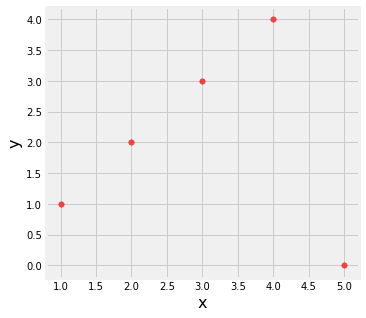

In [63]:
outlier.scatter('x', 'y', s=30, color='r')

In [64]:
correlation(outlier, 'x', 'y')

0.0

Ecological correlations can be misleading:

In [65]:
sat2014 = Table.read_table('http://inferentialthinking.com/notebooks/sat2014.csv')
sat2014.sort('State').show(3)

State,Participation Rate,Critical Reading,Math,Writing,Combined
Alabama,6.7,547,538,532,1617
Alaska,54.2,507,503,475,1485
Arizona,36.4,522,525,500,1547


In [69]:
sat2014.sort('Math', descending=True).show(5)

State,Participation Rate,Critical Reading,Math,Writing,Combined
North Dakota,2.3,612,620,584,1816
Illinois,4.6,599,616,587,1802
Iowa,3.1,605,611,578,1794
Michigan,3.8,593,610,581,1784
Minnesota,5.9,598,610,578,1786


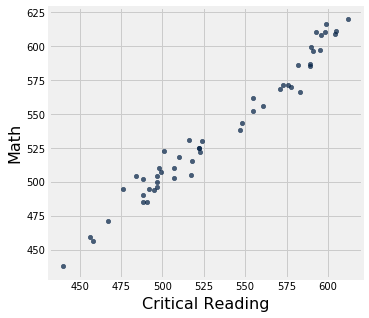

In [70]:
sat2014.scatter('Critical Reading', 'Math')

In [71]:
correlation(sat2014, 'Critical Reading', 'Math')

0.9847558411067433

Discussion question: What could have made North Dakota so great?

In [72]:
sat2014.sort('Math', descending=True).show(5)

State,Participation Rate,Critical Reading,Math,Writing,Combined
North Dakota,2.3,612,620,584,1816
Illinois,4.6,599,616,587,1802
Iowa,3.1,605,611,578,1794
Michigan,3.8,593,610,581,1784
Minnesota,5.9,598,610,578,1786


In [73]:
sat2014.sort('Math', descending=False).show(5)

State,Participation Rate,Critical Reading,Math,Writing,Combined
District of Columbia,100,440,438,431,1309
Idaho,100,458,456,450,1364
Delaware,100,456,459,444,1359
Maine,95.6,467,471,449,1387
Florida,72.2,491,485,472,1448


## Our First Prediction Example

In [74]:
galton = Table.read_table('http://inferentialthinking.com/notebooks/galton.csv')
heights = galton.select(3, 7).relabeled(0, 'MidParent').relabeled(1, 'Child')
heights.show(3)

MidParent,Child
75.43,73.2
75.43,69.2
75.43,69


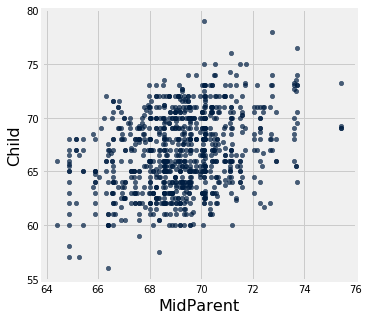

In [75]:
heights.scatter(0)

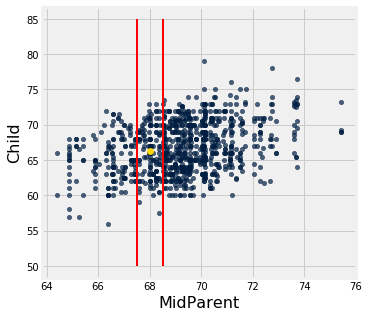

In [76]:
heights.scatter(0)
_ = plt.plot([67.5, 67.5], [50, 85], color='red', lw=2)
_ = plt.plot([68.5, 68.5], [50, 85], color='red', lw=2)
_ = plt.scatter(68, 66.24, color='gold', s=40)

In [77]:
close_to_68 = heights.where('MidParent', are.between(67.5, 68.5))
close_to_68.show(3)

MidParent,Child
68.44,62
67.94,71.2
67.94,67


In [78]:
close_to_68.column('Child').mean()

66.24045801526718

In [79]:
def predict_child(parent):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of parent.
    
    The prediction is the average height of the children 
    whose midparent height is in the range mpht plus or minus 0.5 inches.
    """
    close_points = heights.where('MidParent', are.between(parent - 0.5, parent + 0.5))
    return close_points.column('Child').mean()                       

In [80]:
predict_child(68)

66.24045801526718

In [81]:
predict_child(74)

70.415789473684214

In [82]:
heights_and_predict = heights.with_column(
    'Prediction', heights.apply(predict_child, 'MidParent')
)

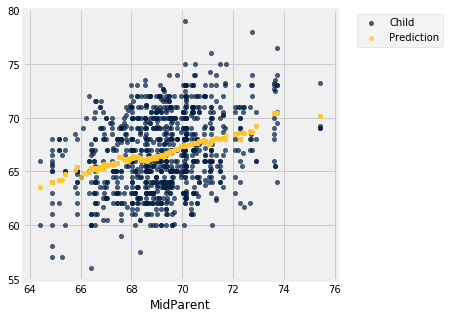

In [83]:
heights_and_predict.scatter(0)

## Linear Regression

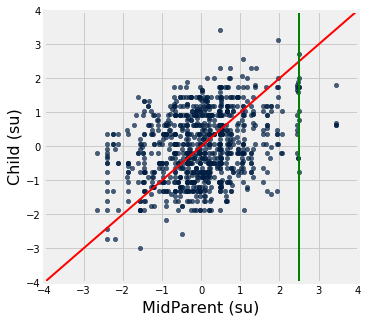

In [84]:
standardize(heights).scatter(0)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.plot([-4, 4], [-4, 4], color='r', lw=2)
plt.plot([2.5, 2.5], [-4, 4], color='g', lw=2)

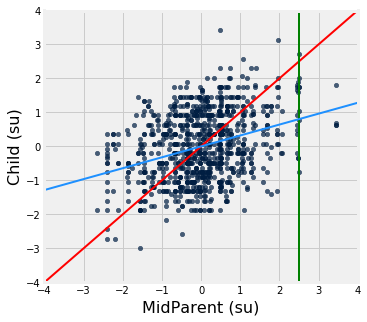

In [85]:
standardize(heights).scatter(0)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.plot([-4, 4], [-4, 4], color='r', lw=2)
plt.plot([2.5, 2.5], [-4, 4], color='g', lw=2)

r = correlation(heights, 0, 1)
plt.plot([-4, 4], [-4*r, 4*r], color='dodgerblue', lw=2)

In [87]:
parent_mean = np.mean(heights.column('MidParent'))
parent_sd = np.std(heights.column('MidParent'))
child_mean = np.mean(heights.column('Child'))
child_sd = np.std(heights.column('Child'))
print('Parent: mean =', parent_mean, '; SD =', parent_sd)
print(' Child: mean =', child_mean, '; SD =', child_sd)
print('     r:', r)

Parent: mean = 69.2067730193 ; SD = 1.80140509692
 Child: mean = 66.7459314775 ; SD = 3.57733460101
     r: 0.320949896064


In [88]:
def predict_with_r(parent):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of mp, 
    using linear regression.
    """
    parent_su = (parent - parent_mean) / parent_sd
    child_su = r * parent_su
    return child_su * child_sd + child_mean

In [89]:
predict_with_r(68)

65.976781543514321

In [90]:
predict_with_r(74)

69.800946925331189

In [91]:
predict_with_r(60)

60.877894367758486

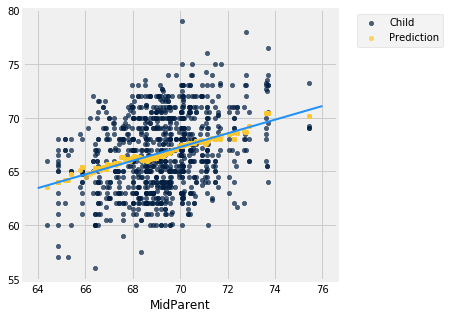

In [92]:
heights_and_predict.scatter(0)
plt.plot([64, 76], [predict_with_r(64), predict_with_r(76)], color='dodgerblue', lw=2)

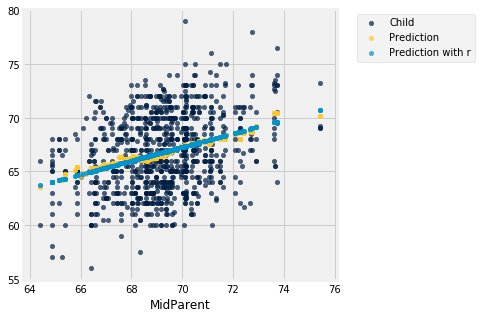

In [93]:
heights_and_predict.with_column(
    'Prediction with r', 
    heights_and_predict.apply(predict_with_r, 'MidParent')).scatter(0)